**1.  Import and Install Dependencies**

In [43]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

**2. Keypoints using MP Holistic**

In [50]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities


In [51]:
def mediapipe_detection(image, model):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # COLOR CONVERSION BGR 2 RGB
  image.flags.writeable = False                   # Image is no longer writeable
  results = model.process(image)                  # Make prediction
  image.flags.writeable = True                    # Image is now writeable
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # COLOR CONVERSION RGB 2 BGR
  return image, results

In [52]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw-left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #Draw right hand connections

In [53]:
def draw_styled_landmarks (image, results):
    #Draw face connections
    mp_drawing.draw_landmarks(image, results. face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(88,22,10), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec (color=(80, 44, 121), thickness=2, circle_radius=2)
                             )
    #Draw Left hand connections
    mp_drawing.draw_landmarks (image, results. left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                               mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                               mp_drawing.DrawingSpec (color=(121,44,250), thickness=2, circle_radius=2) 
                              )
    #Draw right hand connections
    mp_drawing.draw_landmarks (image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                               mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                               mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                              )

In [54]:
# Function to find the index of the first available camera
def find_available_camera():
    for i in range(10):  # Try the first 10 camera indices (adjust as needed)
        cap = cv2.VideoCapture(i)
        if cap.isOpened():
            cap.release()  # Release the camera immediately
            return i
    return None  # No available cameras found

# Find an available camera
camera_index = find_available_camera()

cap = cv2.VideoCapture(camera_index)
# Set mediopipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():

    #Read feed
    ret, frame = cap.read()

    #Make detections
    image, results = mediapipe_detection(frame, holistic)
    print(results)
    
    #Draw landmarks
    draw_styled_landmarks (image, results)

    #Show to screen
    cv2.imshow("OpenCV Feed", image)

    #Break gracefully
    if cv2.waitKey(10) & 0xFF== ord('q'):
        break

  cap.release()
  cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [55]:
len(results.face_landmarks.landmark)

468

In [56]:
results

mediapipe.python.solution_base.SolutionOutputs

In [57]:
draw_landmarks(frame, results)

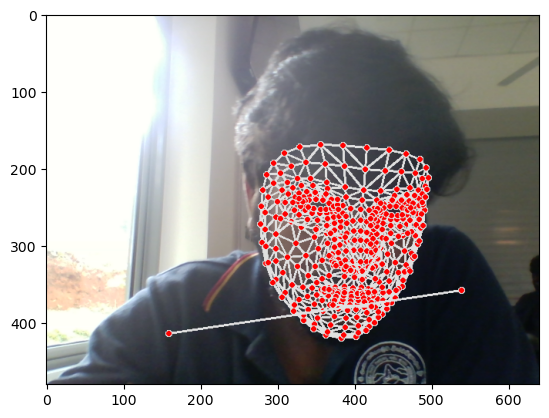

In [58]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

**3.  Exract Keypoint Values**

In [59]:
results.pose_landmarks

landmark {
  x: 0.6418629288673401
  y: 0.7186743021011353
  z: -2.564598798751831
  visibility: 0.9990476369857788
}
landmark {
  x: 0.6904329061508179
  y: 0.6081398725509644
  z: -2.5801503658294678
  visibility: 0.9982286691665649
}
landmark {
  x: 0.7140868306159973
  y: 0.6009789705276489
  z: -2.579455614089966
  visibility: 0.99803227186203
}
landmark {
  x: 0.7337478399276733
  y: 0.5925297141075134
  z: -2.580251693725586
  visibility: 0.9977473020553589
}
landmark {
  x: 0.6069234609603882
  y: 0.602746307849884
  z: -2.62331223487854
  visibility: 0.9988310933113098
}
landmark {
  x: 0.5767082571983337
  y: 0.5921407341957092
  z: -2.6230759620666504
  visibility: 0.9989474415779114
}
landmark {
  x: 0.5478883385658264
  y: 0.5823214650154114
  z: -2.623452663421631
  visibility: 0.9989869594573975
}
landmark {
  x: 0.7381353974342346
  y: 0.5574159622192383
  z: -2.0746634006500244
  visibility: 0.9981780052185059
}
landmark {
  x: 0.47504472732543945
  y: 0.55285871028900

In [60]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [61]:
if results.pose_landmarks:
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten()
else:
    pose = np.zeros(132)

if results.face_landmarks:
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()
else:
    face = np.zeros(21*3)

if results.left_hand_landmarks:
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten()
else:
    lh = np.zeros(21*3)

if results.right_hand_landmarks:
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten()
else:
    rh = np.zeros(21*3)


In [62]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(21*3)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [63]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [64]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(21*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [65]:
extract_keypoints(results)

array([ 0.64186293,  0.7186743 , -2.5645988 , ...,  0.        ,
        0.        ,  0.        ])

**4.  Setup Folders for Collection**

In [1]:
import os
import numpy as np
# Path for exported data, numpy arrays
DATA_PATH = os.path.join("ishari2ireshan")

#Actions that we try to detect
actions = np.array(['hello','howareyou','thanks'])

#Thirty videos worth of data
no_sequences = 50

start_sequence = 400  # Replace with the start of your sequence range
end_sequence = 499   # Replace with the end of your sequence range

#Videos are going to be 30 frames in Length
sequence_length = 30

In [65]:
#hello
## 0
## 1
## 2
## 29
#thanks

# I Love you

In [66]:
for action in actions:
    for sequence in range(start_sequence, end_sequence + 1):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

**5.  Collect Keypoint Values for Training and Testing**

In [67]:
import cv2
import mediapipe as mp
import os
import numpy as np

# Initialize OpenCV window
cv2.namedWindow('OpenCV_Feed', cv2.WINDOW_NORMAL)
cv2.resizeWindow('OpenCV_Feed', 800, 600)  # Adjust window size as needed

# Function to find the index of the first available camera
def find_available_camera():
    for i in range(10):  # Try the first 10 camera indices (adjust as needed)
        cap = cv2.VideoCapture(i)
        if cap.isOpened():
            cap.release()  # Release the camera immediately
            return i
    return None  # No available cameras found

# Find an available camera
camera_index = find_available_camera()

cap = cv2.VideoCapture(camera_index)

# Initialize VideoCapture
# cap = cv2.VideoCapture(4)

# Set mediapipe model
with mp.solutions.holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_sequence, end_sequence + 1):
            cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
#             cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12),
#                         cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
            cv2.imshow('OpenCV_Feed', image)
            cv2.waitKey(2000)  # 2000 milliseconds (2 seconds) delay
            
                    
            # Loop through video Length aka sequence Length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Drow Landmarks
                draw_styled_landmarks(image, results)
                cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # NEW Apply wait logic

#                 if frame_num == 29:
#                     cv2.putText(image, 'STARTING COLLECTION', (120, 200),
#                                 cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12),
#                                 cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     cv2.imshow('OpenCV_Feed', image)
#                     cv2.waitKey(2000)  # 2000 milliseconds (2 seconds) delay
#                 else:
                    

                # Show to screen
                cv2.imshow('OpenCV_Feed', image)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

cap.release()
cv2.destroyAllWindows()


**6.  Preprocess Data and Create Lables and Features**

In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [3]:
label_map = {label:num for num, label in enumerate(actions)}

In [4]:
label_map

{'hello': 0, 'howareyou': 1, 'thanks': 2}

In [132]:
import numpy as np

# Create a NumPy array
arr = np.array([[1, 2, 3], [4, 5, 6]])

# Get the shape of the array
shape = arr.shape

print("Shape of the array:", shape)


Shape of the array: (2, 3)


In [134]:
import numpy as np

# Create a sample 3D array with different dimensions
my_3d_array = np.array([[[1, 2], [3, 4]],
                        [[5, 6], [7, 8]],
                        [[9, 10], [11, 12]],
                        [[13, 14], [15, 16]]])

# Get the shape of the 3D array
shape = my_3d_array.shape

# Print the shape
print("Shape of the 3D array:", shape)


Shape of the 3D array: (4, 2, 2)


In [73]:
import os
import numpy as np

# Define the maximum sequence length you want
max_sequence_length = 29

sequences, labels = [], []

for action in actions:
    for sequence in range(start_sequence, end_sequence + 1):
        window = []
        for frame_num in range(1, max_sequence_length + 1):  # Use the maximum sequence length
            try:
                res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
                if res.shape != (1662):
                    # Example: Use resizing with interpolation
                    res = np.resize(res, (1662))
#                 res = res.astype('float64')
                window.append(res)
            except FileNotFoundError:
                print(frame_num)
                # Handle missing files, e.g., by padding with zeros
#                 window.append(np.zeros_like(res))  # Replace with appropriate padding

#         window = [item.astype('float64') for item in window]
        sequences.append(window)
        labels.append(label_map[action])

# Convert sequences to a NumPy array
numpy_array = np.array(sequences)


In [54]:
sequences, labels = [], []
for action in actions:
    for sequence in range(start_sequence, end_sequence + 1):
        window = []
        for frame_num in range(1,30):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [6]:
numpy_array = np.array(sequences)

In [7]:
# def to_numeric(value, default):
#     try:
#         return int(value)
#     except (ValueError, TypeError):
#         try:
#             return float(value)
#         except (ValueError, TypeError):
#             return default

# # Apply the function element-wise to convert the array to numeric values
# numeric_arr = np.array([to_numeric(x, default=-1) for x in numpy_array], dtype='float')


In [8]:
numpy_array.dtype

dtype('float64')

In [9]:
# numeric_arr.dtype

In [10]:
np.array(sequences).shape

(300, 29, 1662)

In [11]:
np.array(labels).shape

(300,)

In [12]:
x = np.array(sequences)

In [13]:
x.shape

(300, 29, 1662)

In [14]:
y = to_categorical(labels).astype(int)

In [15]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.05)

In [17]:
# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [18]:
# Normalize your input data (example)
# x_train = x_train / 255.0
# x_test = x_test / 255.0

In [19]:
y_test.shape

(15, 3)

**7.  Build and TRain LSTM Neural Network**

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [21]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [22]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(29, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [23]:
x.shape

(300, 29, 1662)

In [24]:
res = [.7,0.2,0.1]

In [25]:
actions[np.argmax(res)]

'hello'

In [26]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [28]:
model.fit(x_train, y_train, epochs=40, callbacks =[tb_callback])

Epoch 1/40
9/9 [==============================] - 1s 92ms/step - loss: 0.3982 - categorical_accuracy: 0.7754
Epoch 2/40
9/9 [==============================] - 1s 106ms/step - loss: 0.3843 - categorical_accuracy: 0.7860
Epoch 3/40
9/9 [==============================] - 1s 93ms/step - loss: 0.4213 - categorical_accuracy: 0.7474
Epoch 4/40
9/9 [==============================] - 1s 92ms/step - loss: 0.3843 - categorical_accuracy: 0.7754
Epoch 5/40
9/9 [==============================] - 1s 93ms/step - loss: 0.3457 - categorical_accuracy: 0.7895
Epoch 6/40
9/9 [==============================] - 1s 91ms/step - loss: 0.3230 - categorical_accuracy: 0.8070
Epoch 7/40
9/9 [==============================] - 1s 90ms/step - loss: 0.3204 - categorical_accuracy: 0.7860
Epoch 8/40
9/9 [==============================] - 1s 92ms/step - loss: 0.3039 - categorical_accuracy: 0.8246
Epoch 9/40
9/9 [==============================] - 1s 93ms/step - loss: 0.2886 - categorical_accuracy: 0.8561
Epoch 10/40
9/9 [=

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 29, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 29, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

**8.  Make Predictions**

In [30]:
re = model.predict(x_test)

In [31]:
actions[np.argmax(res[0])]

'hello'

In [32]:
actions[np.argmax(y_test[0])]

'hello'

**9.  Save Weights**

In [33]:
model.save('action.h5')

In [34]:
model.load_weights('action.h5')

**10.  Evaluation using Confusion Matrix and Accuracy**

In [35]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [36]:
yhat = model.predict(x_train)

In [37]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [38]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[191,   0],
        [  0,  94]],

       [[185,   4],
        [  1,  95]],

       [[189,   1],
        [  4,  91]]], dtype=int64)

In [39]:
accuracy_score(ytrue, yhat)

0.9824561403508771

**11.  Test in Real Time**

In [66]:
colors = [(245,117,16), (117,245, 16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    return output_frame

In [67]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: 'NormalizedLandmark' object is not iterable

<Figure size 1800x1800 with 0 Axes>

In [71]:
# 1. New detection variables
sentence = []
sequence = []
predictions = []
threshold = 0.7


# Function to find the index of the first available camera
def find_available_camera():
    for i in range(10):  # Try the first 10 camera indices (adjust as needed)
        cap = cv2.VideoCapture(i)
        if cap.isOpened():
            cap.release()  # Release the camera immediately
            return i
    return None  # No available cameras found

# Find an available camera
camera_index = find_available_camera()

cap = cv2.VideoCapture(camera_index)

# Set mediopipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        #Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        #Draw Landmarks
        draw_styled_landmarks(image, results)

        #2. Prediction Logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
        sequence.append(keypoints)
        sequence = sequence[-29:]

        if len(sequence) == 29:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions [np.argmax(res)])
            predictions.append(np.argmax(res))

        #3. Viz Logic
            if np.unique(predictions[-10:])[0]== np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])
            if len(sentence) > 5:
                sentence = sentence[-5:]
            # viz probabilities
            image = prob_viz(res, action, image, colors)
        
#         output_frame = input_frame.copy()
#     for num, prob in enumerate(res):
#         cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
#         cv2.putText(output_frame, actions [num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image,''.join(sentence), (3,30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllwindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).